In [26]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
train_csv = pd.read_csv('ca_train.csv')
train_csv.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0
1,2,California,US,36.1162,-119.6816,2020-01-23,0.0,0.0
2,3,California,US,36.1162,-119.6816,2020-01-24,0.0,0.0
3,4,California,US,36.1162,-119.6816,2020-01-25,0.0,0.0
4,5,California,US,36.1162,-119.6816,2020-01-26,0.0,0.0


In [48]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
Id                61 non-null int64
Province/State    61 non-null object
Country/Region    61 non-null object
Lat               61 non-null float64
Long              61 non-null float64
Date              61 non-null object
ConfirmedCases    61 non-null float64
Fatalities        61 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.9+ KB


In [49]:
train_csv.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0
1,2,California,US,36.1162,-119.6816,2020-01-23,0.0,0.0
2,3,California,US,36.1162,-119.6816,2020-01-24,0.0,0.0
3,4,California,US,36.1162,-119.6816,2020-01-25,0.0,0.0
4,5,California,US,36.1162,-119.6816,2020-01-26,0.0,0.0


# Combine (Country / Region with Province/State)

In [50]:
train_csv['combine state'] = train_csv['Country/Region'].fillna('') + str(': ') +train_csv['Province/State'].fillna('')

train_csv.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,combine state
0,1,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0,US: California
1,2,California,US,36.1162,-119.6816,2020-01-23,0.0,0.0,US: California
2,3,California,US,36.1162,-119.6816,2020-01-24,0.0,0.0,US: California
3,4,California,US,36.1162,-119.6816,2020-01-25,0.0,0.0,US: California
4,5,California,US,36.1162,-119.6816,2020-01-26,0.0,0.0,US: California


# EDA : Pandas Profiling Report

In [51]:
train_csv['Date'] = pd.to_datetime(train_csv['Date'])

In [32]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [33]:
from pandas_profiling import ProfileReport
train_profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
train_profile

# Scatter Plot

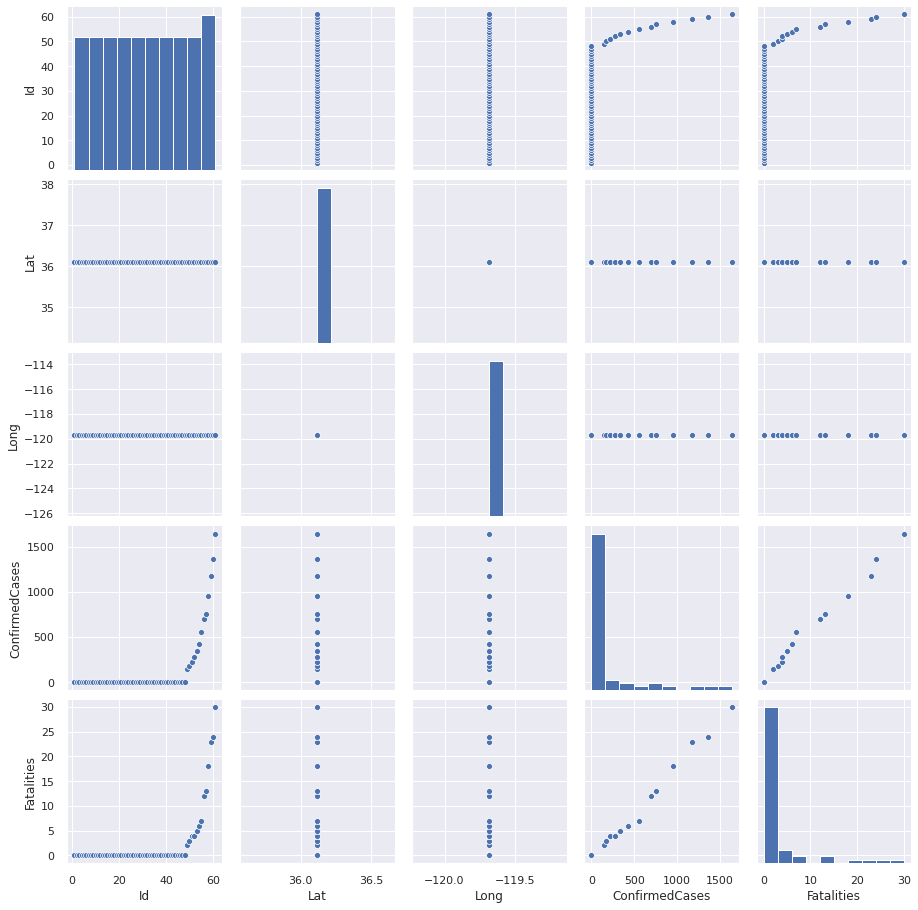

In [34]:
# CREATE SCATTER PLOT 
import seaborn as sns
sns.set()
sns.pairplot(df)

In [52]:
test_df = pd.read_csv('ca_test.csv')

In [53]:
test_df.head()

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,California,US,36.1162,-119.6816,2020-03-12
1,2,California,US,36.1162,-119.6816,2020-03-13
2,3,California,US,36.1162,-119.6816,2020-03-14
3,4,California,US,36.1162,-119.6816,2020-03-15
4,5,California,US,36.1162,-119.6816,2020-03-16


In [54]:
train_csv.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,combine state
0,1,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0,US: California
1,2,California,US,36.1162,-119.6816,2020-01-23,0.0,0.0,US: California
2,3,California,US,36.1162,-119.6816,2020-01-24,0.0,0.0,US: California
3,4,California,US,36.1162,-119.6816,2020-01-25,0.0,0.0,US: California
4,5,California,US,36.1162,-119.6816,2020-01-26,0.0,0.0,US: California


In [61]:
train_csv.tail()

,Id,Province/State,Country/Region,Lat,Long,ConfirmedCases,Fatalities,combine state
Date,,,,,,,,
2020-03-18,57,California,US,36.1162,-119.6816,751.0,13.0,US: California
2020-03-19,58,California,US,36.1162,-119.6816,952.0,18.0,US: California
2020-03-20,59,California,US,36.1162,-119.6816,1177.0,23.0,US: California
2020-03-21,60,California,US,36.1162,-119.6816,1364.0,24.0,US: California
2020-03-22,61,California,US,36.1162,-119.6816,1642.0,30.0,US: California


In [55]:
submission = pd.read_csv('ca_submission.csv')

submission.head()

,ForecastId,ConfirmedCases,Fatalities
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1


In [56]:
# we dont need the whole dataframe to analyze
train_csv = train_csv.set_index('Date')
col = ['combine state',
       'ConfirmedCases', 'Fatalities']
df = train_csv[col]
df.head()

,combine state,ConfirmedCases,Fatalities
Date,,,
2020-01-22,US: California,0.0,0.0
2020-01-23,US: California,0.0,0.0
2020-01-24,US: California,0.0,0.0
2020-01-25,US: California,0.0,0.0
2020-01-26,US: California,0.0,0.0


In [62]:
df1 = df[df['ConfirmedCases']>0.0]
df1



,combine state,ConfirmedCases,Fatalities
Date,,,
2020-03-10,US: California,144.0,2.0
2020-03-11,US: California,177.0,3.0
2020-03-12,US: California,221.0,4.0
2020-03-13,US: California,282.0,4.0
2020-03-14,US: California,340.0,5.0
2020-03-15,US: California,426.0,6.0
2020-03-16,US: California,557.0,7.0
2020-03-17,US: California,698.0,12.0
2020-03-18,US: California,751.0,13.0


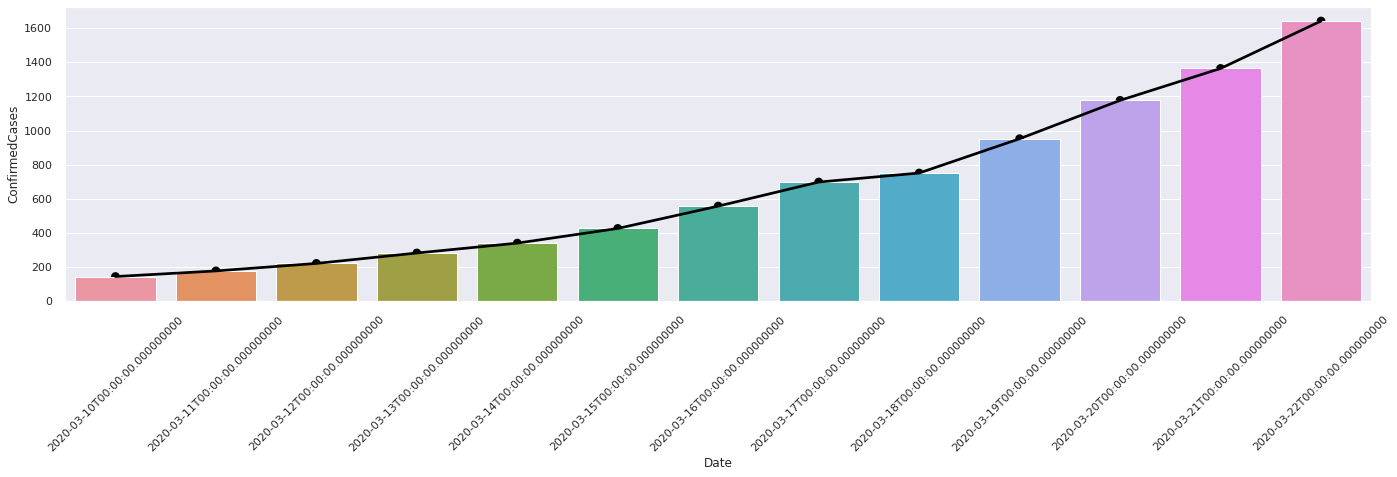

In [63]:
plt.figure(figsize=(20,5))
sns.barplot(x=df1.index,y=df1['ConfirmedCases'])
sns.pointplot(x=df1.index,y=df1['ConfirmedCases'],color='Black')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()


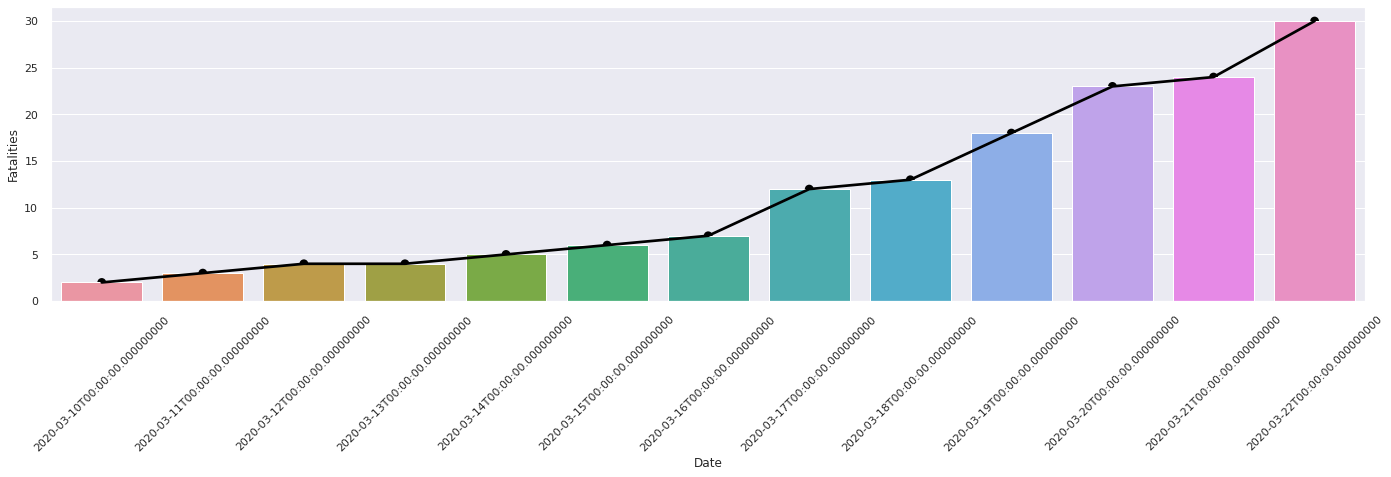

In [64]:
plt.figure(figsize=(20,5))
sns.barplot(x=df1.index,y=df1['Fatalities'])
sns.pointplot(x=df1.index,y=df1['Fatalities'],color='Black')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

# Model Creation and Evaluation

In [78]:
train_csv = pd.read_csv('ca_train.csv')

train_csv = train_csv[train_csv['ConfirmedCases'] > 0.0]

In [79]:
train_csv.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
48,49,California,US,36.1162,-119.6816,2020-03-10,144.0,2.0
49,50,California,US,36.1162,-119.6816,2020-03-11,177.0,3.0
50,51,California,US,36.1162,-119.6816,2020-03-12,221.0,4.0
51,52,California,US,36.1162,-119.6816,2020-03-13,282.0,4.0
52,53,California,US,36.1162,-119.6816,2020-03-14,340.0,5.0


In [80]:
col = ['Id', 'Lat', 'Long','ConfirmedCases', 'Fatalities','Date']
df_final = train_csv[col]
df_final = df_final.reset_index() # Thus the index is reset with the new index column


In [113]:
df_final

,index,Id,Lat,Long,ConfirmedCases,Fatalities,Date
0,48,49,36.1162,-119.6816,144.0,2.0,20200310
1,49,50,36.1162,-119.6816,177.0,3.0,20200311
2,50,51,36.1162,-119.6816,221.0,4.0,20200312
3,51,52,36.1162,-119.6816,282.0,4.0,20200313
4,52,53,36.1162,-119.6816,340.0,5.0,20200314
5,53,54,36.1162,-119.6816,426.0,6.0,20200315
6,54,55,36.1162,-119.6816,557.0,7.0,20200316
7,55,56,36.1162,-119.6816,698.0,12.0,20200317
8,56,57,36.1162,-119.6816,751.0,13.0,20200318
9,57,58,36.1162,-119.6816,952.0,18.0,20200319


In [82]:

df_final['Date'] = pd.to_numeric(df_final.Date.str.replace('-',''))
print( df_final )

    index  Id      Lat      Long  ConfirmedCases  Fatalities      Date
0      48  49  36.1162 -119.6816           144.0         2.0  20200310
1      49  50  36.1162 -119.6816           177.0         3.0  20200311
2      50  51  36.1162 -119.6816           221.0         4.0  20200312
3      51  52  36.1162 -119.6816           282.0         4.0  20200313
4      52  53  36.1162 -119.6816           340.0         5.0  20200314
5      53  54  36.1162 -119.6816           426.0         6.0  20200315
6      54  55  36.1162 -119.6816           557.0         7.0  20200316
7      55  56  36.1162 -119.6816           698.0        12.0  20200317
8      56  57  36.1162 -119.6816           751.0        13.0  20200318
9      57  58  36.1162 -119.6816           952.0        18.0  20200319
10     58  59  36.1162 -119.6816          1177.0        23.0  20200320
11     59  60  36.1162 -119.6816          1364.0        24.0  20200321
12     60  61  36.1162 -119.6816          1642.0        30.0  20200322


In [83]:
# select the columns and devide the dataset into train and development data 
col_X = ['Date']
col_Ycon = ['ConfirmedCases']
col_Yfat = ['Fatalities']
trainX = df_final[col_X].iloc[:,:]
trainYcon = df_final[col_Ycon].iloc[:,:]
trainF= df_final[col_Yfat].iloc[:,:]

In [84]:
import numpy
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
def polyfit(x, y, degree):
        import numpy
        results = {}

        coeffs = numpy.polyfit(x, y, degree)

         # Polynomial Coefficients
        results['polynomial'] = coeffs.tolist()

        # r-squared
        p = numpy.poly1d(coeffs)
        # fit values, and mean
        yhat = p(x)                         # or [p(z) for z in x]
        ybar = numpy.sum(y)/len(y)          # or sum(y)/len(y)
        ssreg = numpy.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
        sstot = numpy.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
        results['R square:'] = ssreg / sstot
        print('equation :')
        print( p)
        return p, results

# Confirmed Cases Data Training

In [93]:
trainYcon['ConfirmedCases'].values
trainX['Date'].values

array([20200310, 20200311, 20200312, 20200313, 20200314, 20200315,
       20200316, 20200317, 20200318, 20200319, 20200320, 20200321,
       20200322])

In [94]:
# Train the model on training data
p, results = polyfit(trainX['Date'].values,trainYcon['ConfirmedCases'].values, degree = 8)

equation :
           8             7             6             5             4
8.712e-45 x + 4.407e-38 x - 1.017e-30 x - 4.362e-23 x - 1.036e-15 x
              3          2
 - 1.779e-08 x - 0.1692 x + 2.991e+06 x + 2.415e+14


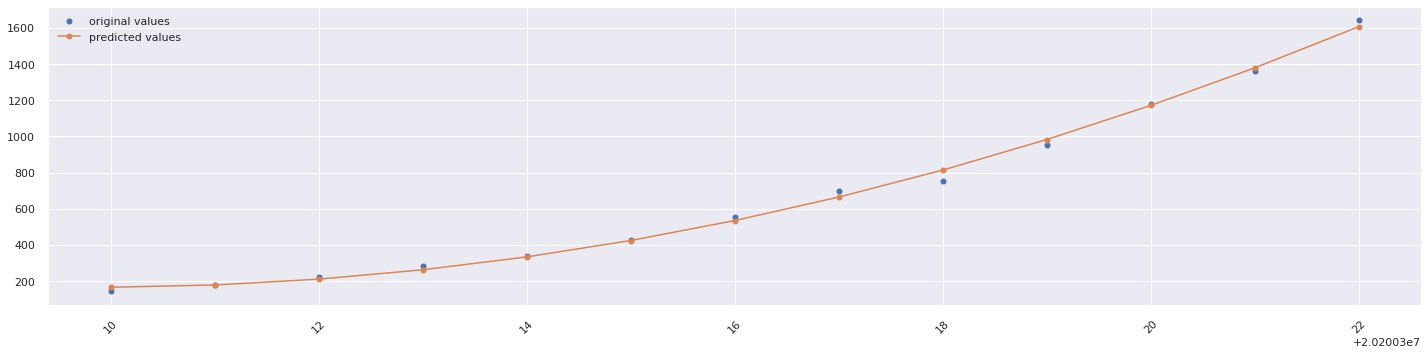

In [95]:
plt.figure(figsize=(20,5))
plt.plot(trainX['Date'].values,trainYcon['ConfirmedCases'].values, 'o', label='original values ')# original values 
plt.plot(trainX['Date'].values,p(trainX['Date']), '-o', label='predicted values')# predicted values 
plt.legend()
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

In [106]:
# Testing Dataset 
testing = pd.read_csv('ca_test.csv')
#
testing['Date'] = pd.to_numeric(testing.Date.str.replace('-',''))
testing.head() 

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,California,US,36.1162,-119.6816,20200312
1,2,California,US,36.1162,-119.6816,20200313
2,3,California,US,36.1162,-119.6816,20200314
3,4,California,US,36.1162,-119.6816,20200315
4,5,California,US,36.1162,-119.6816,20200316


In [107]:
testing['confirmed cases'] = p(testing['Date'])# predicted values 
testing.head()

,ForecastId,Province/State,Country/Region,Lat,Long,Date,confirmed cases
0,1,California,US,36.1162,-119.6816,20200312,2.974609
1,2,California,US,36.1162,-119.6816,20200313,3.728516
2,3,California,US,36.1162,-119.6816,20200314,4.916016
3,4,California,US,36.1162,-119.6816,20200315,6.535156
4,5,California,US,36.1162,-119.6816,20200316,8.587891


# Fatalities Data Training

In [108]:
# Train the model on training data
p, results = polyfit(trainX['Date'].values,trainF['Fatalities'].values, degree = 8)

equation :
          8             7             6             5             4
1.93e-46 x + 9.762e-40 x - 2.253e-32 x - 9.662e-25 x - 2.294e-17 x
              3            2
 - 3.941e-10 x - 0.003747 x + 6.626e+04 x + 5.35e+12


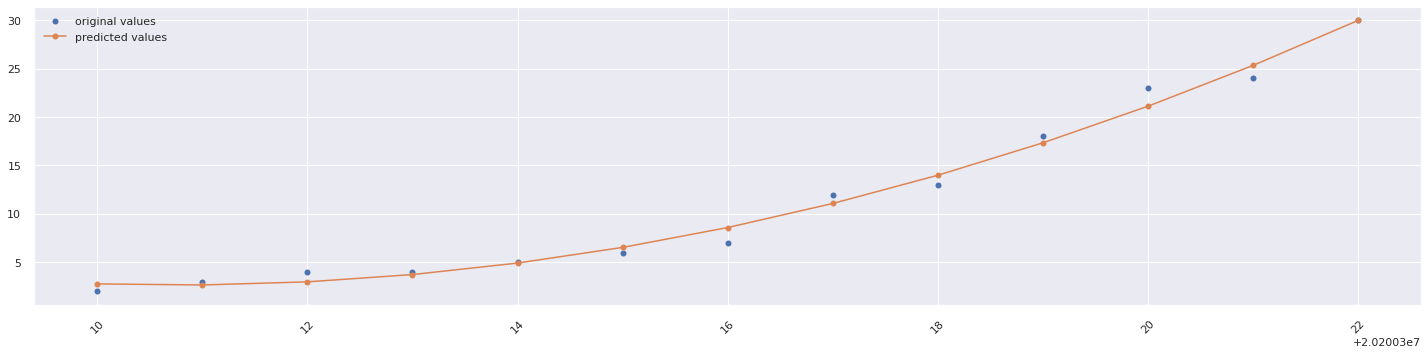

In [109]:
plt.figure(figsize=(20,5))
plt.plot(trainX['Date'].values,trainF['Fatalities'].values, 'o', label='original values ')# original values 
plt.plot(trainX['Date'].values,p(trainX['Date']), '-o', label='predicted values')# predicted values 
plt.legend()
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

In [110]:
testing['Fatalities'] = p(testing['Date'])# predicted values 
testing['Fatalities'] = testing['Fatalities']
testing.head()

,ForecastId,Province/State,Country/Region,Lat,Long,Date,confirmed cases,Fatalities
0,1,California,US,36.1162,-119.6816,20200312,2.974609,2.974609
1,2,California,US,36.1162,-119.6816,20200313,3.728516,3.728516
2,3,California,US,36.1162,-119.6816,20200314,4.916016,4.916016
3,4,California,US,36.1162,-119.6816,20200315,6.535156,6.535156
4,5,California,US,36.1162,-119.6816,20200316,8.587891,8.587891


In [111]:
submission = pd.read_csv('ca_submission.csv')
submission['ConfirmedCases']  = testing['confirmed cases']
submission['Fatalities']  = testing['Fatalities']
submission.head()

,ForecastId,ConfirmedCases,Fatalities
0,1,2.974609,2.974609
1,2,3.728516,3.728516
2,3,4.916016,4.916016
3,4,6.535156,6.535156
4,5,8.587891,8.587891


In [112]:
submission.to_csv("submission.csv", index=False, header=True)